# Spine Model

Differential equation for the Calcium concentration at the post synaptic spine.

In [17]:
# Model and simulation parameters

freq = 5 #Hz
const τ₁ = 50.0
const τ₂ = 5.0
const τ_b = 20.0
const τ_k = 56.0
const τ_Ca = 50.0
const vₑ = 1.0
const v_b = 60.0
const v_k = 2.0
const vᵣ = - 65.0
const Vᵣₑᵥ = 130.0
const α = 5.0
const K_d = 0.32
const P₀ = 10.0
const ḡ = 0.00103
const t_est = collect(1:1000/freq:1000)
const τ_f = 200.0
const τ_s = 50.0
const I_f = 0.5
const I_s = 0.5

0.5

Defining the differential equation goberning the calcium concentration:

$$\frac{d[Ca^{2+}]}{dt} = - I_{NMDA}(t) - \frac{1}{\tau_{Ca}} [Ca^{2+}]$$


In [18]:
dCa(Ca, Δt, t) = - Inmda(Ca, t, t_est, Δt) - (1/τ_Ca) * Ca

dCa (generic function with 1 method)

$$I_{NMDA}(t,\{t_{pre}\},\{t_{post}\}) = \bar{g}f(t,t_{pre})\mathcal{H}(V)$$

In [19]:
Inmda(Ca, t, t_pre, Δt) = ḡ * f(t, t_pre) * ℋ(V(Ca, t, t_pre, Δt))

Inmda (generic function with 1 method)

$$f(t,t_{pre})=P_0[I_fΘ(t−t_{pre})e^{−(t−t_{pre})/τf} +I_sΘ(t−t_{pre})e^{−(t−t_{pre})/τs}]$$

In [20]:
f(t, t_pre) = P₀ * (I_f * Θ(t - t_pre) * exp(-(t - t_pre)/τ_f) + I_s * Θ(t - t_pre) * exp(-(t - t_pre)/τ_s))
f(t, t_pre::Vector) = sum(f.(t, t_pre))

f (generic function with 2 methods)

$$\mathcal{H}(V) = \frac{V(t) - V_{rev}}{1 + \frac{e^{-0.062V}}{3.59}}$$

In [21]:
ℋ(V) = (V - Vᵣₑᵥ) / (1 + (exp(-0.062 * V)/3.57))

ℋ (generic function with 1 method)

$$V (t) = v_R + BPAP(t) + EPSP_{AMPA}(t) + EPSP_{SK}(t)$$

In [22]:
V(Ca, t, t_pre, Δt) = vᵣ + BPAP(t, t_pre, Δt) + EPSP_AMPA(t, t_pre) + EPSP_SK(Ca, t, t_pre, Δt)

V(Ca, t, t_pre::Vector, Δt) = vᵣ + sum(BPAP.(t, t_pre, Δt) + EPSP_AMPA.(t, t_pre) + EPSP_SK.(Ca, t, t_pre, Δt))

V (generic function with 2 methods)

$$BPAP(t,t_{post}) = v_B Θ(t − t_{post}) e^{\frac{−(t−tpost)}{τ_B}}$$

In [23]:
# Defining a Heaviside function
Θ(x) = x < zero(x) ? zero(x) : one(x)

Θ (generic function with 1 method)

In [24]:
BPAP(t, t_pre, Δt) = v_b * Θ(t - (t_pre + Δt)) * exp(-(t - (t_pre + Δt))/τ_b)

BPAP (generic function with 1 method)

$$ESPS_{AMPA}(t) = v_E Θ(t−t_{pre})􏰂 \bigg[e^{\frac{−(t−t_{pre})}{τ_1}} +e^{\frac{−(t−t_{pre})}{τ_2}}\bigg]􏰃$$

In [25]:
EPSP_AMPA(t, t_pre) = vₑ * Θ(t - t_pre) * (exp(-(t - t_pre)/τ₁) + exp(-(t - t_pre)/τ₂))

EPSP_AMPA (generic function with 1 method)

$$EPSP_{SK} = v_{SK} \bigg[ \frac{[Ca^{2+}]^\alpha}{[Ca^{2+}]^\alpha K^\alpha_d} \bigg]$$

$$v_{SK} = v_k Θ(t−t_{post})􏰂 e^{\frac{−(t−t_{post})}{τ_k}}$$

In [26]:
EPSP_SK(Ca, t, t_pre, Δt) = v_sk(t, t_pre, Δt) * (Ca^α / (Ca^α + K_d^α))

v_sk(t, t_pre, Δt) = v_k * Θ(t - (t_pre + Δt)) * exp(-(t - (t_pre + Δt))/τ_k) + 0.018

v_sk (generic function with 1 method)

Defining the ODE system

In [27]:
using OrdinaryDiffEq

In [28]:
Ca₀ = 0.0
t = 0.0:1:1000.0
Δt = 10.0
prob = ODEProblem(dCa, Ca₀, (0.0,1000.0), Δt, saveat = t)
sol1 = solve(prob, Tsit5())

Δt = -20.0
prob = remake(prob, p = Δt)
sol2 = solve(prob, Tsit5());

In [29]:
using Plots

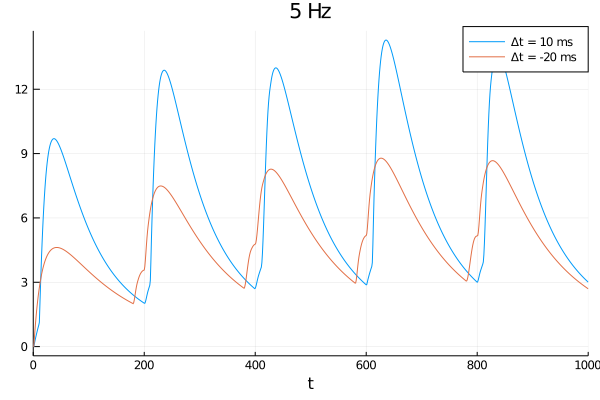

In [30]:
plot(sol1 , label = "Δt = 10 ms", title = "5 Hz")
plot!(sol2 , label = "Δt = -20 ms")

In [31]:
using Interact

In [32]:
@Interact.manipulate for Δt ∈ -100:1.0:100
    Ca₀ = 0.0
    t = 0.0:1:1000.0
    prob = ODEProblem(dCa, Ca₀, (0.0,1000.0), Δt, saveat = t)
    sol = solve(prob, Tsit5())
    plot(sol, label = "Δt = $Δt ms", title = "5 Hz")
    ylims!(0,15.0)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Δt"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/ger/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/ger/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/ger/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/ger/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/ger/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012d62db10, Task (runnable) @0x000000012d62db10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-100.0\",\"-99.0\",\"-98.0\",\"-97.0\",\"-96.0\",\"-95.0\",\"-94.0\",\"-93.0\",\"-92.0\",\"-91.0\",\"-90.0\",\"-89.0\",\"-88.0\",\"-87.0\",\"-86.0\",\"-85.0\",\"-84.0\",\"-83.0\",\"-82.0\",\"-81.0\",\"-80.0\",\"-79.0\",\"-78.0\",\"-77.0\",\"-76.0\",\"-75.